<a href="https://colab.research.google.com/github/AlbericoJose/Coleta-e-Analise/blob/main/analise_dados_olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando dados das olimpiadas

In [2]:
import pandas as pd

In [3]:
# variavel para o caminho do arquivo
file = '/content/drive/MyDrive/MBA/PYTHON/results.csv'

In [4]:
#criando uma tupla para selecionar as colunas que quero trabalhar
columns = ('Gender','Event','Location','Year','Medal','Name','Nationality','Time','Wind')

In [5]:
# skiprows pula a primeira linha do arquivo que é o cabeçalho, será substituido pela tupla acima
df = pd.read_csv(file, names=columns, skiprows=1)

In [6]:
df

,Gender,Event,Location,Year,Medal,Name,Nationality,Time,Wind
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17,NaN
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64,NaN
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26,NaN
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17,NaN
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77,NaN
...,...,...,...,...,...,...,...,...,...
2389,W,Triple Jump Women,Athens,2004,S,Hrysopiyi DEVETZI,GRE,15.25,NaN
2390,W,Triple Jump Women,Athens,2004,B,Tatyana LEBEDEVA,RUS,15.14,NaN
2391,W,Triple Jump Women,Atlanta,1996,G,Inessa KRAVETS,UKR,15.33,NaN
2392,W,Triple Jump Women,Atlanta,1996,S,Inna LASOVSKAYA,RUS,14.98,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       2394 non-null   object 
 1   Event        2394 non-null   object 
 2   Location     2394 non-null   object 
 3   Year         2394 non-null   int64  
 4   Medal        2394 non-null   object 
 5   Name         2164 non-null   object 
 6   Nationality  2394 non-null   object 
 7   Time         2394 non-null   object 
 8   Wind         12 non-null     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 168.5+ KB


In [8]:
df.describe()

,Year,Wind
count,2394.000000,12.00000
mean,1970.379282,-0.02500
std,34.711777,0.56909
min,1896.000000,-0.90000
25%,1948.000000,-0.15000
50%,1976.000000,0.10000
75%,2000.000000,0.22500
max,2016.000000,0.60000


In [9]:
#verificar os anos únicos
df['Year'].unique()

array([2016, 2008, 2000, 1992, 1984, 1976, 1968, 1960, 1952, 1936, 1928,
       1920, 2012, 2004, 1996, 1980, 1972, 1964, 1956, 1948, 1932, 1924,
       1912, 1908, 1900, 1904, 1896, 1988])

In [10]:
#ordenar os anos
df['Year'].sort_values().unique()

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012, 2016])

In [11]:
#realizar um describe somente das colunas do tipo object
df.describe(include='object')

,Gender,Event,Location,Medal,Name,Nationality,Time
count,2394,2394,2394,2394,2164,2394,2394
unique,2,47,23,3,1681,97,1947
top,M,Marathon Men,London,G,Merlene OTTEY,USA,None
freq,1632,84,253,799,7,639,43


In [12]:
#verificar atletas que mais aparecem
df.groupby(by='Name').count()['Medal'].sort_values(ascending=False).head()

Name
Merlene OTTEY         7
Paavo NURMI           7
Tirunesh DIBABA       6
Usain BOLT            6
Irena KIRSZENSTEIN    6
Name: Medal, dtype: int64

In [13]:
#filtrando  coluna de 100 metros razos feminino que ganharam medalha de ouro
df.loc[(df['Event'] == '100M Women') & (df['Medal'] == 'G')]

,Gender,Event,Location,Year,Medal,Name,Nationality,Time,Wind
1687,W,100M Women,Rio,2016,G,Elaine THOMPSON,JAM,10.71,NaN
1690,W,100M Women,Beijing,2008,G,Shelly-Ann FRASER-PRYCE,JAM,10.78,NaN
1696,W,100M Women,Barcelona,1992,G,Gail DEVERS,USA,10.82,NaN
1699,W,100M Women,Los Angeles,1984,G,Evelyn ASHFORD,USA,10.97,NaN
1702,W,100M Women,Montreal,1976,G,Annegret RICHTER-IRRGANG,FRG,11.08,NaN
1705,W,100M Women,Mexico,1968,G,Wyomia TYUS,USA,11.0,NaN
1708,W,100M Women,Rome,1960,G,Wilma RUDOLPH,USA,11.0,NaN
1711,W,100M Women,Helsinki,1952,G,Marjorie JACKSON,AUS,11.5,NaN
1714,W,100M Women,Berlin,1936,G,Helen STEPHENS,USA,11.5,NaN
1717,W,100M Women,Amsterdam,1928,G,Elizabeth ROBINSON,USA,12.2,NaN


In [14]:
#salvando (armazenando em uma váriavel) o filtro realizado
df_women_100m = df.loc[(df['Event'] == '100M Women') & (df['Medal'] == 'G')]
df_women_100m

,Gender,Event,Location,Year,Medal,Name,Nationality,Time,Wind
1687,W,100M Women,Rio,2016,G,Elaine THOMPSON,JAM,10.71,NaN
1690,W,100M Women,Beijing,2008,G,Shelly-Ann FRASER-PRYCE,JAM,10.78,NaN
1696,W,100M Women,Barcelona,1992,G,Gail DEVERS,USA,10.82,NaN
1699,W,100M Women,Los Angeles,1984,G,Evelyn ASHFORD,USA,10.97,NaN
1702,W,100M Women,Montreal,1976,G,Annegret RICHTER-IRRGANG,FRG,11.08,NaN
1705,W,100M Women,Mexico,1968,G,Wyomia TYUS,USA,11.0,NaN
1708,W,100M Women,Rome,1960,G,Wilma RUDOLPH,USA,11.0,NaN
1711,W,100M Women,Helsinki,1952,G,Marjorie JACKSON,AUS,11.5,NaN
1714,W,100M Women,Berlin,1936,G,Helen STEPHENS,USA,11.5,NaN
1717,W,100M Women,Amsterdam,1928,G,Elizabeth ROBINSON,USA,12.2,NaN


In [16]:
#procurando pelo ano 2000 que não está aparecendo do df acima 
#o ano de 2000 não aparece no filto acima, porque o filtro está por medalha de ouro 
df.loc[(df['Year'] == 2000) & (df['Event'] == '100M Women')]

,Gender,Event,Location,Year,Medal,Name,Nationality,Time,Wind
1693,W,100M Women,Sydney,2000,S,Ekaterini THANOU,GRE,11.12,NaN
1694,W,100M Women,Sydney,2000,S,Tanya LAWRENCE,JAM,11.18,NaN
1695,W,100M Women,Sydney,2000,B,Merlene OTTEY,JAM,11.19,NaN


In [17]:
df.loc[(df['Year'] == 1988) & (df['Event'] == '100M Women')]

,Gender,Event,Location,Year,Medal,Name,Nationality,Time,Wind


In [18]:
df.loc[df['Year'] == 1988]

,Gender,Event,Location,Year,Medal,Name,Nationality,Time,Wind
423,M,20Km Race Walk Men,Seoul,1988,G,Jozef PRIBILINEC,TCH,1:19:57,NaN
424,M,20Km Race Walk Men,Seoul,1988,S,Ronald WEIGEL,GDR,1:20:00,NaN
425,M,20Km Race Walk Men,Seoul,1988,B,Maurizio DAMILANO,ITA,1:20:14,NaN
911,M,50Km Race Walk Men,Seoul,1988,G,Vyacheslav IVANENKO,URS,3:38:29,NaN
912,M,50Km Race Walk Men,Seoul,1988,S,Ronald WEIGEL,GDR,3:38:56,NaN
913,M,50Km Race Walk Men,Seoul,1988,B,Hartwig GAUDER,GDR,3:39:45,NaN
1058,M,Decathlon Men,Seoul,1988,G,Christian SCHENK,GDR,8488.0,NaN
1059,M,Decathlon Men,Seoul,1988,S,Torsten VOSS,GDR,8399.0,NaN
1060,M,Decathlon Men,Seoul,1988,B,Dave STEEN,CAN,8328.0,NaN
1426,M,Marathon Men,Seoul,1988,G,Gelindo BORDIN,ITA,2:10:32,NaN


In [19]:
#incluindo os anos de 1988 e 2020, que não estavam no dataset
df_women_100m.loc[len(df_women_100m.index)] = ['W', '100M Women', 'Seoul', '1988', 'G', 'Florence Griffith JOYNER', 'USA', 10.54, 3.0]
df_women_100m.loc[len(df_women_100m.index)] = ['W', '100M Women', 'Tokyo', '2020', 'G', 'Elaine THOMPSON', 'JAM', 10.61, -0.6]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [20]:
df_women_100m

,Gender,Event,Location,Year,Medal,Name,Nationality,Time,Wind
1687,W,100M Women,Rio,2016,G,Elaine THOMPSON,JAM,10.71,NaN
1690,W,100M Women,Beijing,2008,G,Shelly-Ann FRASER-PRYCE,JAM,10.78,NaN
1696,W,100M Women,Barcelona,1992,G,Gail DEVERS,USA,10.82,NaN
1699,W,100M Women,Los Angeles,1984,G,Evelyn ASHFORD,USA,10.97,NaN
1702,W,100M Women,Montreal,1976,G,Annegret RICHTER-IRRGANG,FRG,11.08,NaN
1705,W,100M Women,Mexico,1968,G,Wyomia TYUS,USA,11.0,NaN
1708,W,100M Women,Rome,1960,G,Wilma RUDOLPH,USA,11.0,NaN
1711,W,100M Women,Helsinki,1952,G,Marjorie JACKSON,AUS,11.5,NaN
1714,W,100M Women,Berlin,1936,G,Helen STEPHENS,USA,11.5,NaN
1717,W,100M Women,Amsterdam,1928,G,Elizabeth ROBINSON,USA,12.2,NaN


In [21]:
#deixar somente as colunas que vamos utilizar
df_women_100m = df_women_100m.drop(columns=['Gender', 'Event', 'Medal'])
df_women_100m

,Location,Year,Name,Nationality,Time,Wind
1687,Rio,2016,Elaine THOMPSON,JAM,10.71,NaN
1690,Beijing,2008,Shelly-Ann FRASER-PRYCE,JAM,10.78,NaN
1696,Barcelona,1992,Gail DEVERS,USA,10.82,NaN
1699,Los Angeles,1984,Evelyn ASHFORD,USA,10.97,NaN
1702,Montreal,1976,Annegret RICHTER-IRRGANG,FRG,11.08,NaN
1705,Mexico,1968,Wyomia TYUS,USA,11.0,NaN
1708,Rome,1960,Wilma RUDOLPH,USA,11.0,NaN
1711,Helsinki,1952,Marjorie JACKSON,AUS,11.5,NaN
1714,Berlin,1936,Helen STEPHENS,USA,11.5,NaN
1717,Amsterdam,1928,Elizabeth ROBINSON,USA,12.2,NaN


In [22]:
#tive que converter o ano para inteiro para poder ordenar em seguida
df_women_100m['Year'] = df_women_100m['Year'].astype(int)

In [23]:
#ordenar DF pelo ano
df_women_100m = df_women_100m.sort_values('Year')
df_women_100m

,Location,Year,Name,Nationality,Time,Wind
1717,Amsterdam,1928,Elizabeth ROBINSON,USA,12.2,NaN
1744,Los Angeles,1932,Stanislawa WALASIEWICZ,POL,11.9,NaN
1714,Berlin,1936,Helen STEPHENS,USA,11.5,NaN
1741,London,1948,Fanny BLANKERS-KOEN,NED,11.9,NaN
1711,Helsinki,1952,Marjorie JACKSON,AUS,11.5,NaN
1738,Melbourne / Stockholm,1956,Betty CUTHBERT,AUS,11.5,NaN
1708,Rome,1960,Wilma RUDOLPH,USA,11.0,NaN
1735,Tokyo,1964,Wyomia TYUS,USA,11.4,NaN
1705,Mexico,1968,Wyomia TYUS,USA,11.0,NaN
1732,Munich,1972,Renate STECHER,GDR,11.07,NaN


In [24]:
#transformando tempo em float
df_women_100m['Time'] = df_women_100m['Time'].astype(float)

In [25]:
df_women_100m = df_women_100m.rename(columns={'Time' : 'Time / s'})

In [26]:
df_women_100m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1717 to 20
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     21 non-null     object 
 1   Year         21 non-null     int64  
 2   Name         21 non-null     object 
 3   Nationality  21 non-null     object 
 4   Time / s     21 non-null     float64
 5   Wind         2 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ KB


In [27]:
df_women_100m.describe()

,Year,Time / s,Wind
count,21.000000,21.000000,2.000000
mean,1975.809524,11.150476,1.200000
std,27.927798,0.453315,2.545584
min,1928.000000,10.540000,-0.600000
25%,1956.000000,10.820000,0.300000
50%,1976.000000,11.000000,1.200000
75%,1996.000000,11.500000,2.100000
max,2020.000000,12.200000,3.000000


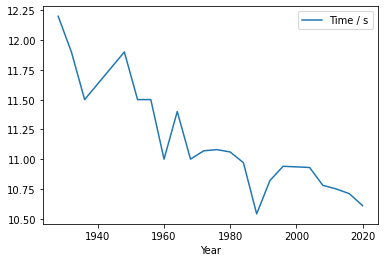

In [28]:
#criando gráfico que mostra a evolução do tempo dos atletas ao longo dos anos
df_women_100m.plot(x='Year', y='Time / s')

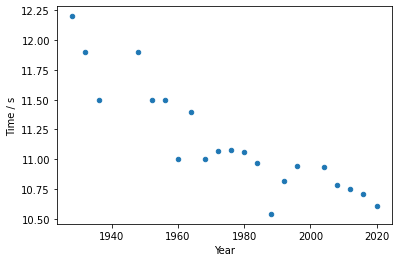

In [29]:
df_women_100m.plot.scatter(x='Year', y='Time / s')

In [30]:
#melhorando um pouco a apresentação das informações acima com o matplotlib - matplotlib se utiliza de gráficos estáticos
import matplotlib.pyplot as plt
plt.style.use('ggplot')

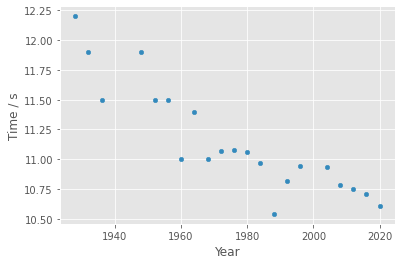

In [31]:
df_women_100m.plot.scatter(x='Year', y='Time / s')

In [32]:
#por padrão a apresentação dos gráficos do PD é no formato matplotlib, estou realizando a alteração para utilizar o plotly, que se utiliza de gráficos dinâmicos
pd.options.plotting.backend = 'plotly'

In [33]:
df_women_100m.plot.scatter(x='Year', y='Time / s')

In [34]:
#incluindo nome e nacionalide ao gráfico
df_women_100m.plot.scatter(x='Year', y='Time / s',
                           hover_name='Name',
                           hover_data=['Nationality'],
                           size='Time / s',
                           color='Time / s',
                           title='Jogos Olimpicos - Medalhistas de Ouro dos 100m - Progressão do Tempo')